Лабораторная работа №6 (2).Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением. Исследовать зависимость погрешности от сеточных параметров.

In [345]:
import math
import typing
import matplotlib.pyplot as plt

$$\frac{\partial ^ 2 u}{\partial t ^ 2} + 2 \frac{\partial u}{\partial t} = \frac{\partial ^ 2 u}{\partial x ^ 2} + 2 \frac{\partial u}{\partial x} -  3 u$$

Граничные условия $$u_x(0, t) =   - exp(-t) cos(2t) \\ u(\pi, t) = - exp(-t - \pi) cos(2t) \\ u(x, 0) = exp(-x) cos(x) \\ u_t(x, 0) = -exp(-x) cos(x)$$

Аналитическое решение $$ U(x, t) = exp(-t - x) cos(x) cos(2t)$$

$$ \alpha \frac{\partial  u(0, t)}{\partial x} + \beta u(0, t) = \phi_0 (t) \\ \\
    \gamma \frac{\partial  u(l, t)}{\partial x} + \delta u(l, t) = \phi_l (t) $$

### Входные условия

$$\frac{\partial ^ 2 u}{\partial t ^ 2} + 2 \frac{\partial u}{\partial t} = \frac{\partial ^ 2 u}{\partial x ^ 2} + 2 \frac{\partial u}{\partial x} -  3 u => \frac{\partial ^ 2 u}{\partial t ^ 2}  = \frac{\partial ^ 2 u}{\partial x ^ 2} + 2 \frac{\partial u}{\partial x} -  3 u - 2 \frac{\partial u}{\partial t}$$

In [346]:
left, right = 0, math.pi
a = 1
b = 2
c = -3
d = 2
alpha = 1
betta = 0
gamma = 0
delta = 1

In [347]:
def phi_0(t:float) -> float: #### diff
    return  -1 * math.exp(-t) * math.cos(2 * t)


def phi_l(t:float) -> float:  #### not diff
    return -1 * math.exp(-t - math.pi) * math.cos(2 * t)


def psi_1(x:float) -> float:
    return math.exp(-x) * math.cos(x)

def psi_2(x:float) -> float:
    return -1 * math.exp(-x) * math.cos(x) 

def f(x:float, t:float) -> float:
    return 0

def U(x:float, t:float) -> float:
    return math.exp(-t - x) * math.cos(x) * math.cos(2 * t)

def real_U(X:list, T:list) -> list:
    n = len(X)
    m = len(T)
    U_true = [[0] * n for _ in range(m)]
    for k in range(m):
        for j in range(n):
            U_true[k][j] = U(X[j], T[k])
    return U_true

### Вспомогательные функиции

графики

In [348]:


def plot_graphs(new_X:list, new_T:list, found_U:list, U_true:list, s:str='') -> None:
    plt.plot(new_X, U_true[len(new_T) // 4 ],  label='Аналитическое решение' + ' t = '+ str(round(new_T[len(new_T) // 4 ], 4)))
    plt.plot(new_X, found_U[len(new_T) // 4 ], label=s + ' t = '+ str(round(new_T[len(new_T) // 4 ], 4)), linestyle='dashdot')
    plt.plot(new_X, U_true[len(new_T) // 2 ], label='Аналитическое решение' + ' t = '+ str(round(new_T[len(new_T) // 2 ], 4)))
    plt.plot(new_X, found_U[len(new_T) // 2 ], label=s + ' t = '+ str(round(new_T[-1], 4)), linestyle='dashdot')
    plt.plot(new_X, U_true[-1], label='Аналитическое решение' + ' t = '+ str(round(new_T[-1], 4)))
    plt.plot(new_X, found_U[-1],label=s + ' t = '+ str(round(new_T[-1], 4)), linestyle='dashdot')
    plt.legend()


Ошибка в зависимотсти от h

In [349]:
def error (U_my:list, U_true:list) -> float:
    return sum([abs(a - b) for a, b in zip(U_my, U_true)])
def get_error_array_with_h(N:list, left:float, right:float, a:float, b:float, c:float, d:float, alpha:float, betta:float, gamma:float, delta:float, find_u:typing.Callable, t_end:float=1, appoximation:int=1, appoximation_start:float=1) -> (list, list): # H, error
    H = [right/(n - 1) for n in N]
    ERROR = []
    for n in N:
        XX, TT, UU = find_u(left, right, a, b, c, d, alpha, betta, gamma, delta, n=n, t_end=t_end, appoximation=appoximation, appoximation_start=appoximation_start)
        U_true = real_U(XX, TT)
        t = len(TT) // 2
        ERROR.append(error(UU[t], U_true[t]))
    
    return H, ERROR

График ошибки в зависимости от h

In [350]:
def h_error_plot(H:list, ERROR:list) -> None:
    plt.plot(H, ERROR)
    plt.xlabel("h")
    plt.ylabel("error")
    plt.show()

рендж

In [351]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

получение T и X

In [352]:
def get_t(t0:float, t_end:float, tau:float) -> list:
    return [i for i in frange(t0, t_end+tau, tau)]

def get_x(x_0:float, x_l:float, h:float) -> list:
    return [i for i in frange(x_0, x_l+h, h)]

Прогонка

In [353]:
def solve_PQ(A0:list, A1:list, A2:list, B:list) -> list:
    P = [-A2[0] / A1[0]]
    Q = [B[0] / A1[0]]
    for i in range(1, len(B)):

        P.append(-A2[i] / (A1[i] + A0[i] * P[i - 1]))
        Q.append((B[i] - A0[i] * Q[i - 1]) / (A1[i] + A0[i] * P[i - 1]))

    res = [Q[-1]]

    for i in range(len(B) - 2, -1, -1):
        res.append(P[i] * res[-1] + Q[i])

    return res[::-1]

### Явная схема крест

$$ \frac {u^{k+1}_{j} - 2 u^k_j + u^{k-1}_j} {\tau ^ 2}  + d \frac{u^{k+1}_{j} - u^{k-1}_{j}}{2 \tau}= a^2 \frac {u^{k}_{j+1} - 2 u^k_j + u^{k}_{j-1}}{h ^ 2} +  b \frac{u^{k}_{j+1} - u^{k}_{j-1}}{2h} + c u^k_j + f^k_j$$

In [354]:
def explicit_cross(left:float, right:float, a:float, b:float, c:float, d:float, alpha:float, betta:float, gamma:float, delta:float, n:int=10, t_end:float=1, appoximation:int=1, appoximation_start:int=1) -> (list, list, list):
    def approx(appoximation:int, k:float) -> None:
        if appoximation == 1:
            U_values[k][0] = (h * phi_0(T[k]) - alpha * U_values[k][1]) / (betta * h - alpha)
            U_values[k][-1] = (h * phi_l(T[k]) + gamma * U_values[k][-2]) / (gamma + delta * h)
        if appoximation == 2:
            U_values[k][0] = (2 * h * phi_0(T[k]) - 4 * alpha * U_values[k][1] + alpha * U_values[k][2]) / (2 * betta * h - 3 * alpha)
            U_values[k][-1] = (2 * h * phi_l(T[k]) + 4 * gamma * U_values[k][-2] - gamma * U_values[k][-3]) / (2 * delta * h + 3 * gamma)
        if appoximation == 3:
            U_values[k][0] = (phi_0(T[k]) * h * tau * (2 * a ** 2 - b * h) - 2 * alpha * a ** 2 * U_values[k][1] * tau - alpha * h ** 2 * U_values[k - 1][0]) / (
                -2 * alpha * a ** 2 * tau - alpha * h ** 2 + c * h ** 2 * tau + betta * h * tau * (2 * a ** 2 - b * h))
            U_values[k][-1] = (phi_l(T[k]) * h * tau * (2 * a ** 2 + b * h) + 2 * gamma * a ** 2 * U_values[k][-2] * tau + gamma * h ** 2 * U_values[k - 1][ - 1]) / (
                                          2 * gamma * a ** 2 * tau + gamma * h ** 2 - c * h ** 2 * tau + delta * h * tau * (2 * a ** 2 + b * h))
    
    n = n 
    h = right / (n - 1)
    tau =  (h**2) / 2 / a**2  # для того, чтобы выполнялось условие устойчивости
    X = get_x(left, right, h)
    T =  get_t(0, t_end, tau)
    mu = b * tau**2 / 2 / h
    sigma = alpha**2 * tau ** 2 / h**2

    U_values = [[0] * n for _ in range(len(T))]

    for j in range(n):
        U_values[0][j] = psi_1(X[j])
        if appoximation_start == 1:
            U_values[1][j] = U_values[0][j] + tau * psi_2(X[j])
        if appoximation_start == 2:
            U_values[1][j] = psi_1(X[j]) + tau * psi_2(X[j]) + (tau**2) * (-d * psi_2(X[j]) 
                + a * (psi_1(X[j]) - psi_1(X[j] - h)) / h + b * (psi_2(X[j]) - psi_2(X[j] - h)) / h + c * psi_1(X[j]) + f(X[j],0)) / 2

    for k in range(2, len(T)):
        for j in range(1, len(X) - 1):
            U_values[k][j] = ((sigma + mu) * U_values[k-1][j + 1] + (-2 * sigma + 2 + c * tau**2) * U_values[k-1][j] + (sigma - mu) * U_values[k-1][j - 1] + (-1 + d*tau/2) * U_values[k - 2][j] + tau**2 *  f(X[j], T[k-1]))/(1 + d * tau / 2)
        approx(appoximation, k=k)


    return X, T, U_values

Демонстация работы

In [355]:
XX, TT, UU = explicit_cross(left, right, a, b, c, d, alpha, betta, gamma, delta, n=20, t_end=3, appoximation=2, appoximation_start=2)
U_true = real_U(XX, TT)


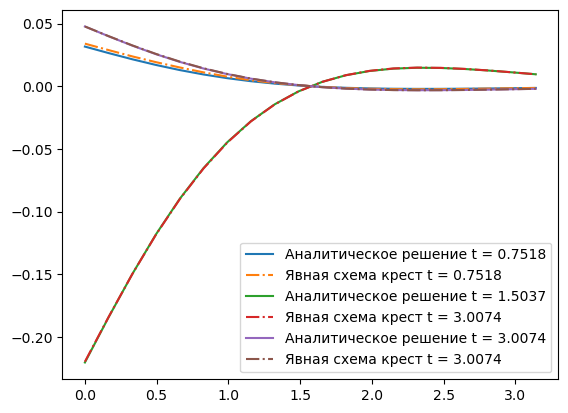

In [356]:
plot_graphs(XX, TT, UU, U_true, 'Явная схема крест')

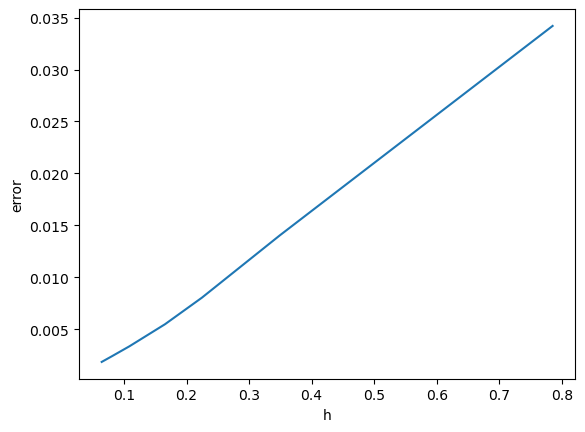

In [357]:
N = [5, 10, 15, 20, 30, 40, 50]
H, ERROR = get_error_array_with_h(N, left, right, a, b, c, d, alpha, betta, gamma, delta, explicit_cross, t_end=3, appoximation=1, appoximation_start=1)
h_error_plot(H, ERROR)

### Неявная схема крест

In [358]:
def implicit_cross(left:float, right:float, a:float, b:float, c:float, d:float, alpha:float, betta:float, gamma:float, delta:float, n:int=10, t_end:float=1, appoximation:int=1, appoximation_start:int=1) -> (list, list, list):
    def approx(appoximation:int, k:int) -> None:
        if appoximation == 1:
            A0[-1] = -gamma/h
            A1[0] = betta - alpha/h
            A1[-1] = delta  + gamma/h
            A2[0] = alpha / h
            B[0] = phi_0(T[k])
            B[-1] = phi_l(T[k])
        if appoximation == 2:
            coeff = a / (2 * h) / A2[1]
            coeff_ = -gamma / (2 * h) / A0[-2]
            A0[-1] = -2 * gamma / h + coeff_ * A1[-2]
            A1[0] = -3 * alpha / (2 * h) + betta + A0[1] * coeff
            A1[-1] = 3 * gamma / (2 * h) + delta + A2[-2] * coeff_
            A2[0] = 2 * alpha / h + A1[1] * coeff
            B[0] = phi_0(T[k]) + B[1] * coeff
            B[-1] = phi_l(T[k]) + B[-2] * coeff_
        if appoximation == 3:
            A0[-1] = 0
            A1[0] = 2 * a ** 2 / h + h / tau - c * h - betta / alpha * (2 * a ** 2 - b * h)
            A1[-1] = delta
            A2[0] = -2 * a ** 2 / h
            B[0] = h / tau * U_values[k-1][0] - phi_0(T[k]) * (2 * a ** 2 - b * h) / alpha
            B[-1] = phi_l(T[k])
              
    n = n 
    h = right / (n - 1)
    tau = (h**2) / 2 / a**2  # для того, чтобы выполнялось условие устойчивости
    X = get_x(left, right, h)
    T =  get_t(0, t_end, tau)



    U_values = [[0] * n for _ in range(len(T))]

    for j in range(n):
        U_values[0][j] = psi_1(X[j])
        if appoximation_start == 1:
            U_values[1][j] = U_values[0][j] + tau * psi_2(X[j])
        if appoximation_start == 2:
            U_values[1][j] = psi_1(X[j]) + tau * psi_2(X[j]) + (tau**2) * (-d * psi_2(X[j]) + a * (
                psi_1(X[j]) - psi_1(X[j] - h)) / h + b * (psi_2(X[j]) - psi_2(X[j] - h)) / h + c * psi_1(X[j]) + f(X[j],0)) / 2
                
    for k in range(2, len(T)):
        A0 = [0 for _ in range(n)]
        A1 = [0 for _ in range(n)]
        A2 = [0 for _ in range(n)]
        B = [0 for _ in range(n)]

        for j in range(1, len(X) - 1):
            A0[j] = 2 * a - h * b
            A1[j] =  2 * (h**2) * (-d / (2 * tau) - 1 / (tau ** 2) + c) - 4 * a
            A2[j] = 2 * a + h * b
            B[j] = -4 * (h**2) * U_values[k-1][j] / (tau**2) + (2 * (h**2) / (tau**2) - d * (h**2) / tau) * U_values[k-2][j] - 2 * (h**2) * f(X[j],T[k])
        approx(appoximation, k)
        U_values[k] = solve_PQ(A0, A1, A2, B)
    return X, T, U_values

In [359]:
XX2, TT2, UU2 = implicit_cross(left, right, a, b, c, d, alpha, betta, gamma, delta, n=15, t_end=3, appoximation=1, appoximation_start=2)
U_true2 = real_U(XX2, TT2)

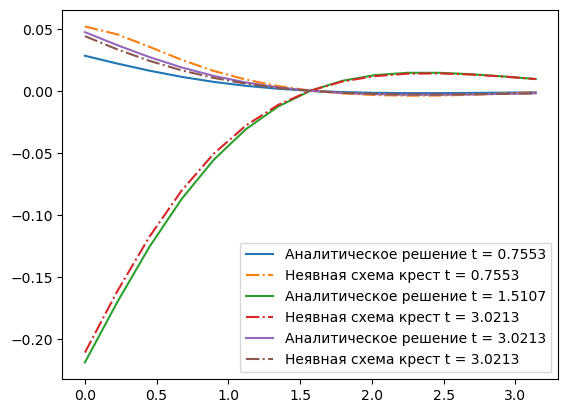

In [360]:
plot_graphs(XX2, TT2, UU2, U_true2, 'Неявная схема крест')

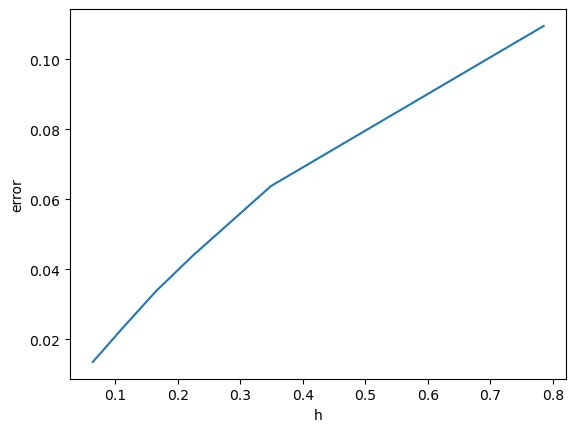

In [361]:
N = [5, 10, 15, 20, 30, 40, 50]
H, ERROR = get_error_array_with_h(N, left, right, a, b, c, d, alpha, betta, gamma, delta, implicit_cross, t_end=3, appoximation=1, appoximation_start=2)
h_error_plot(H, ERROR)